# MAGIC Gamma Telescope Dataset - EDA and GBDT

# 1. EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('telescope_data.csv')

In [3]:
df.head()

Unnamed: 0   fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  \
0           0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   
1           1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   
2           2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580   
3           3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   
4           4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   

   fM3Trans   fAlpha     fDist class  
0   -8.2027  40.0920   81.8828     g  
1   -9.9574   6.3609  205.2610     g  
2  -45.2160  76.9600  256.7880     g  
3   -7.1513  10.4490  116.7370     g  
4   21.8393   4.6480  356.4620     g

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19020 non-null  int64  
 1   fLength     19020 non-null  float64
 2   fWidth      19020 non-null  float64
 3   fSize       19020 non-null  float64
 4   fConc       19020 non-null  float64
 5   fConc1      19020 non-null  float64
 6   fAsym       19020 non-null  float64
 7   fM3Long     19020 non-null  float64
 8   fM3Trans    19020 non-null  float64
 9   fAlpha      19020 non-null  float64
 10  fDist       19020 non-null  float64
 11  class       19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
df.describe()

Unnamed: 0       fLength        fWidth         fSize         fConc  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean    9509.500000     53.250154     22.180966      2.825017      0.380327   
std     5490.745396     42.364855     18.346056      0.472599      0.182813   
min        0.000000      4.283500      0.000000      1.941300      0.013100   
25%     4754.750000     24.336000     11.863800      2.477100      0.235800   
50%     9509.500000     37.147700     17.139900      2.739600      0.354150   
75%    14264.250000     70.122175     24.739475      3.101600      0.503700   
max    19019.000000    334.177000    256.382000      5.323300      0.893000   

             fConc1         fAsym       fM3Long      fM3Trans        fAlpha  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean       0.214657     -4.331745     10.545545      0.249726     27.645707   
std        0.110511     59.206062     51.000118     20.827439     26.103621   
min        0.000300   -457.916100   -331.780000   -205.894700      0.000000   
25%        0.128475    -20.586550    -12.842775    -10.849375      5.547925   
50%        0.196500      4.013050     15.314100      0.666200     17.679500   
75%        0.285225     24.063700     35.837800     10.946425     45.883550   
max        0.675200    575.240700    238.321000    179.851000     90.000000   

              fDist  
count  19020.000000  
mean     193.818026  
std       74.731787  
min        1.282600  
25%      142.492250  
50%      191.851450  
75%      240.563825  
max      495.561000

In [6]:
# Missing Value
df.isnull().sum()

Unnamed: 0    0
fLength       0
fWidth        0
fSize         0
fConc         0
fConc1        0
fAsym         0
fM3Long       0
fM3Trans      0
fAlpha        0
fDist         0
class         0
dtype: int64

Text(0.5, 1.0, 'Class Counts')

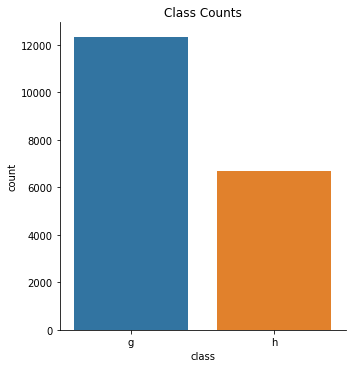

In [7]:
# Target Class
sns.catplot(x = 'class', kind='count', data = df)
plt.title('Class Counts')

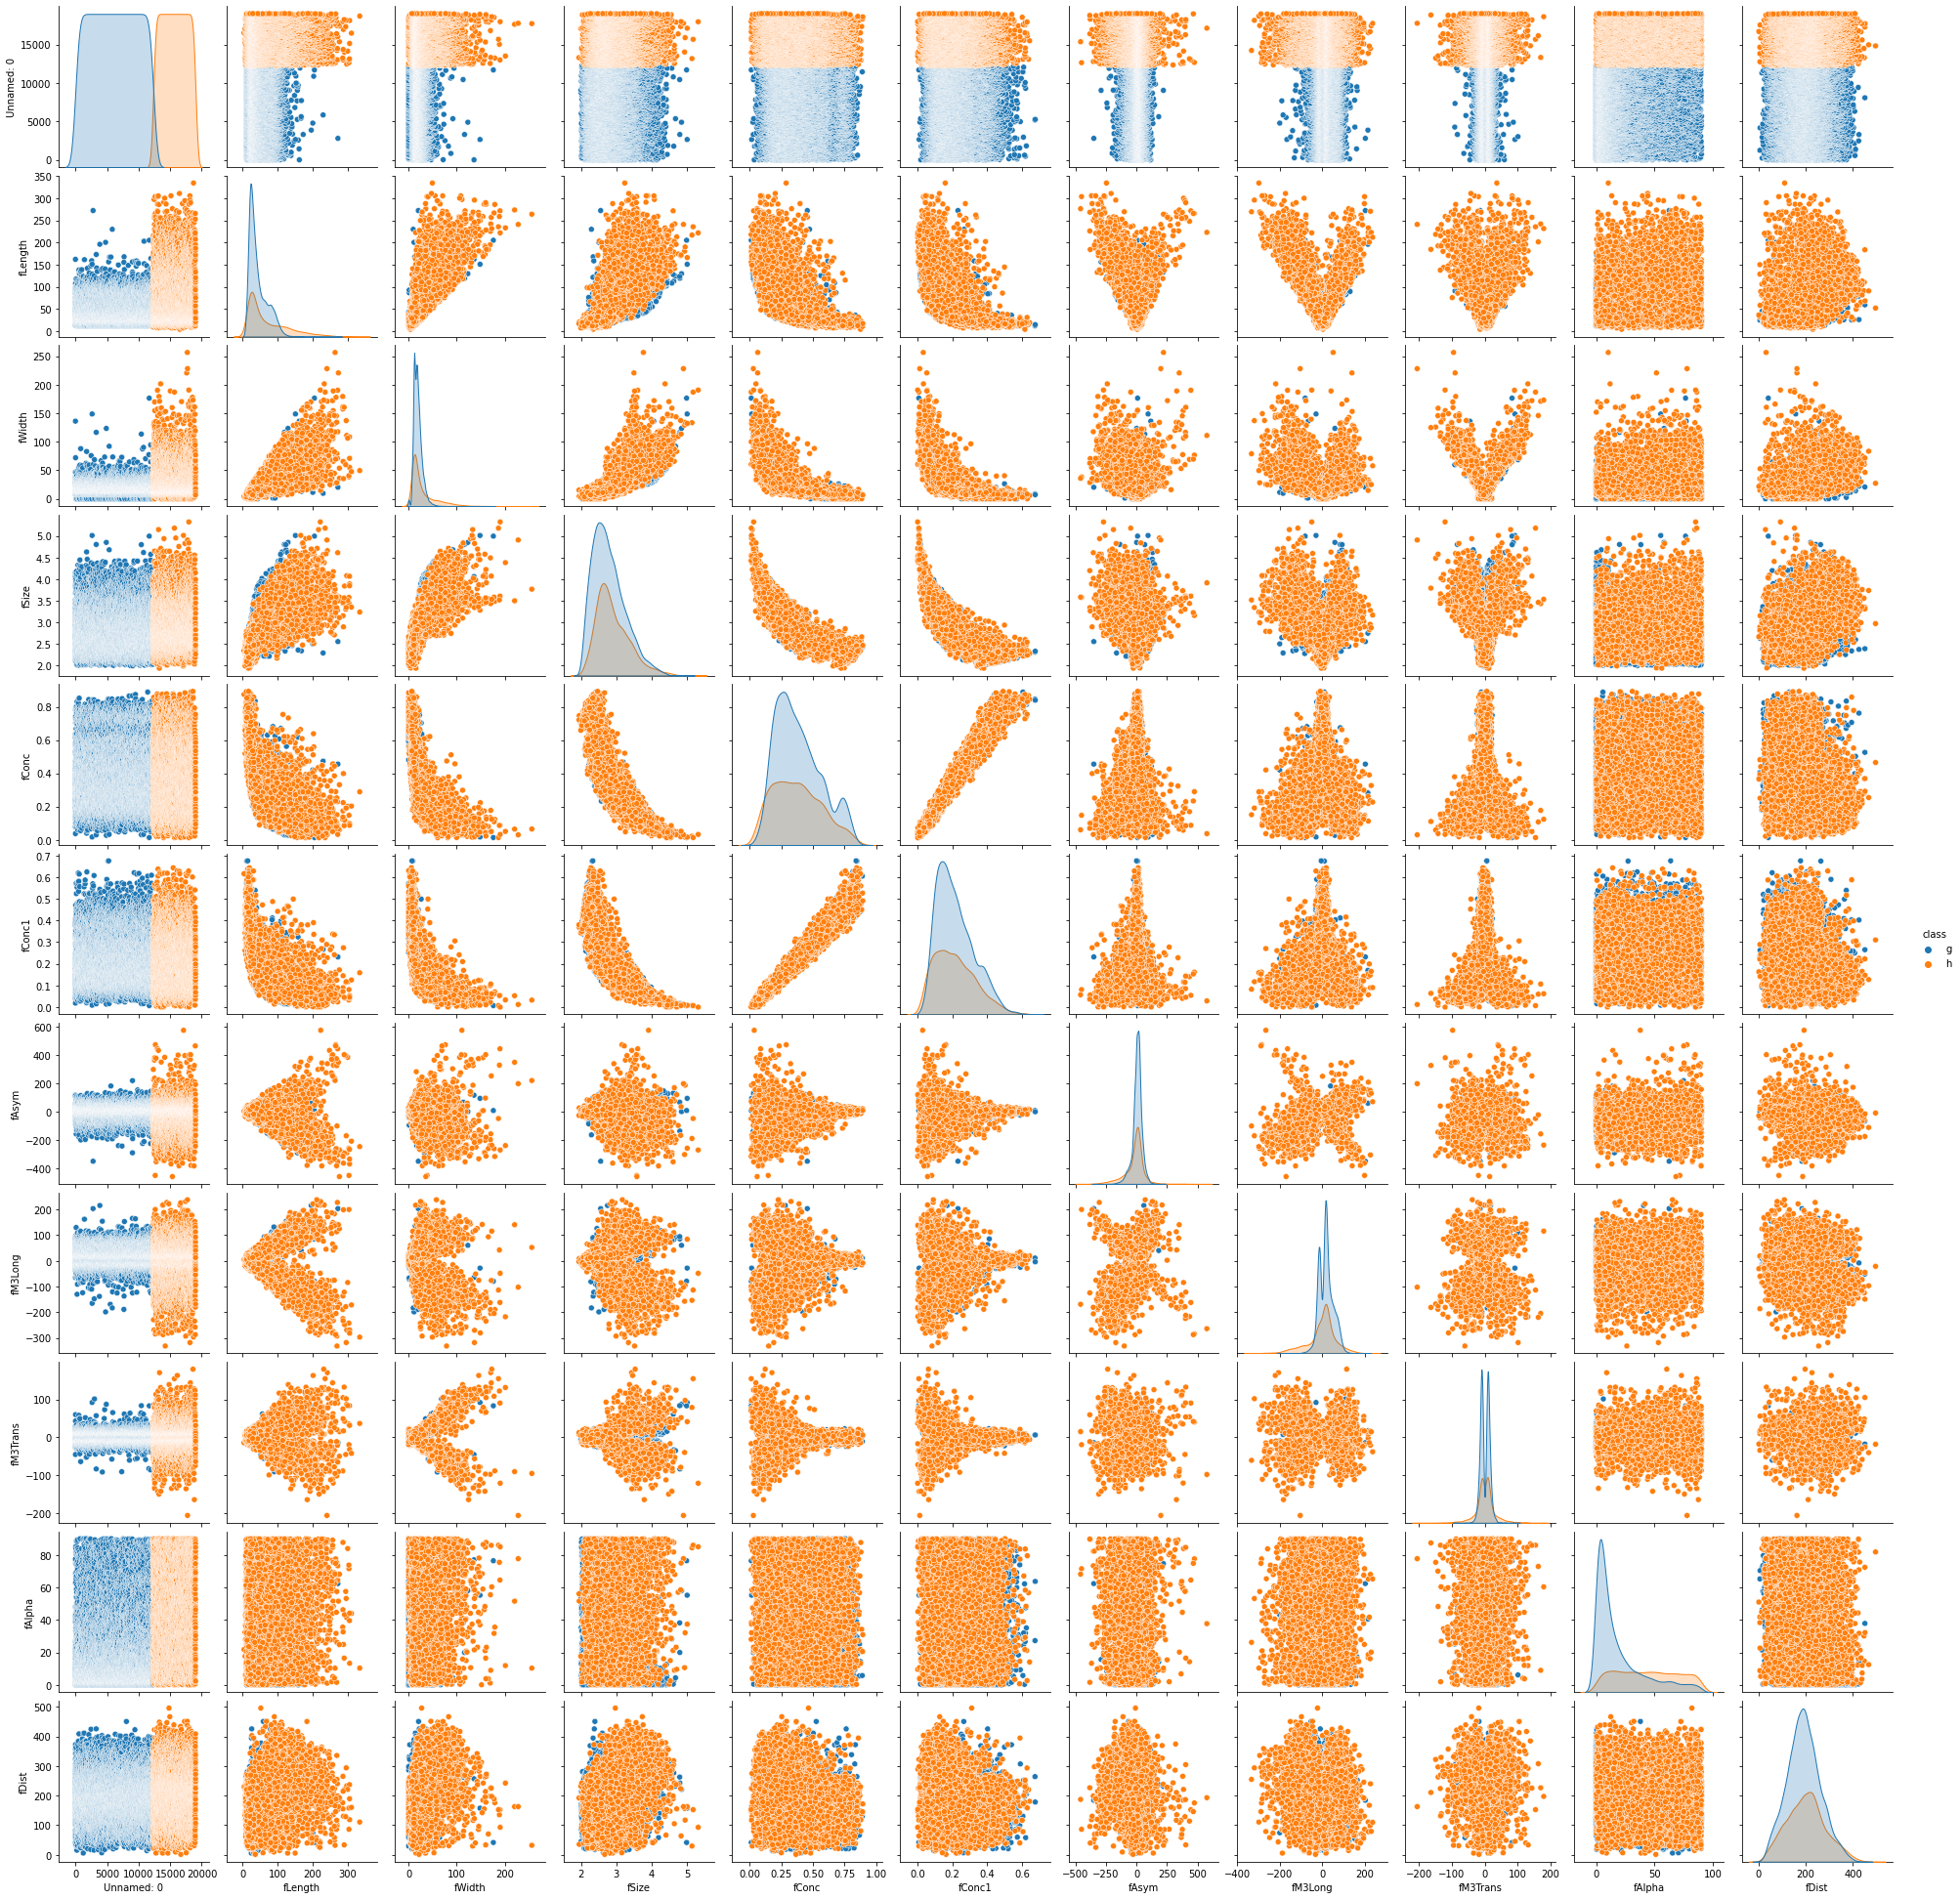

In [8]:
sns.pairplot(df, hue='class')

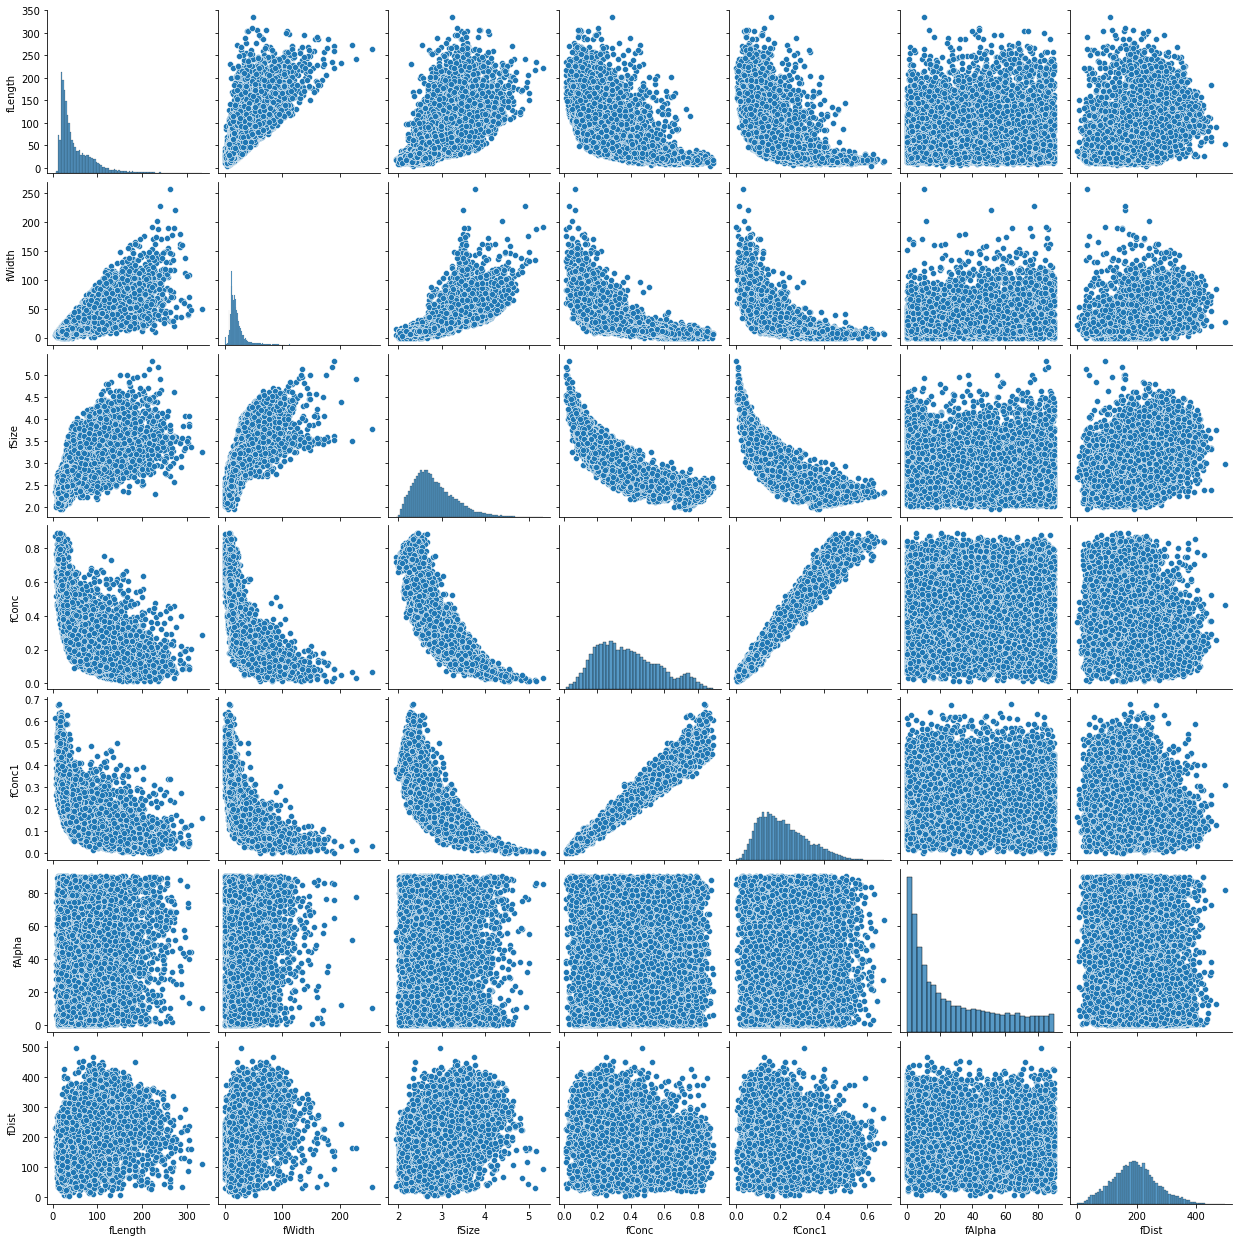

In [9]:
sns.pairplot(df[['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAlpha','fDist']], diag_kind='hist')

In [10]:
df[df['class']=='g'].head()

Unnamed: 0   fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  \
0           0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   
1           1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   
2           2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580   
3           3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   
4           4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   

   fM3Trans   fAlpha     fDist class  
0   -8.2027  40.0920   81.8828     g  
1   -9.9574   6.3609  205.2610     g  
2  -45.2160  76.9600  256.7880     g  
3   -7.1513  10.4490  116.7370     g  
4   21.8393   4.6480  356.4620     g

In [11]:
df[df['class']=='h'].head()

Unnamed: 0   fLength   fWidth   fSize   fConc  fConc1    fAsym  \
12332       12332   93.7035  37.9432  3.1454  0.1680  0.1011  53.2566   
12333       12333  102.0005  22.0017  3.3161  0.1064  0.0724 -54.0862   
12334       12334  100.2775  21.8784  3.1100  0.3120  0.1446 -48.1834   
12335       12335   91.6558  18.8293  2.7097  0.4386  0.3420 -52.6841   
12336       12336   38.0195  12.6736  2.8747  0.4084  0.1928 -51.4840   

       fM3Long  fM3Trans   fAlpha     fDist class  
12332  89.0566   11.8175  14.1224  231.9028     h  
12333  43.0553  -15.0647  88.4636  274.9392     h  
12334  57.6547   -9.6341  20.7848  346.4330     h  
12335 -97.8373  -17.0955  63.8834  130.7998     h  
12336   8.3471    7.9620  24.5402  163.8674     h

In [12]:
df_g = df[df['class']=='g']

In [13]:
df_h = df[df['class']=='h']

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'fLength'}>,
        <AxesSubplot:title={'center':'fWidth'}>],
       [<AxesSubplot:title={'center':'fSize'}>,
        <AxesSubplot:title={'center':'fConc'}>,
        <AxesSubplot:title={'center':'fConc1'}>],
       [<AxesSubplot:title={'center':'fAsym'}>,
        <AxesSubplot:title={'center':'fM3Long'}>,
        <AxesSubplot:title={'center':'fM3Trans'}>],
       [<AxesSubplot:title={'center':'fAlpha'}>,
        <AxesSubplot:title={'center':'fDist'}>, <AxesSubplot:>]],
      dtype=object)

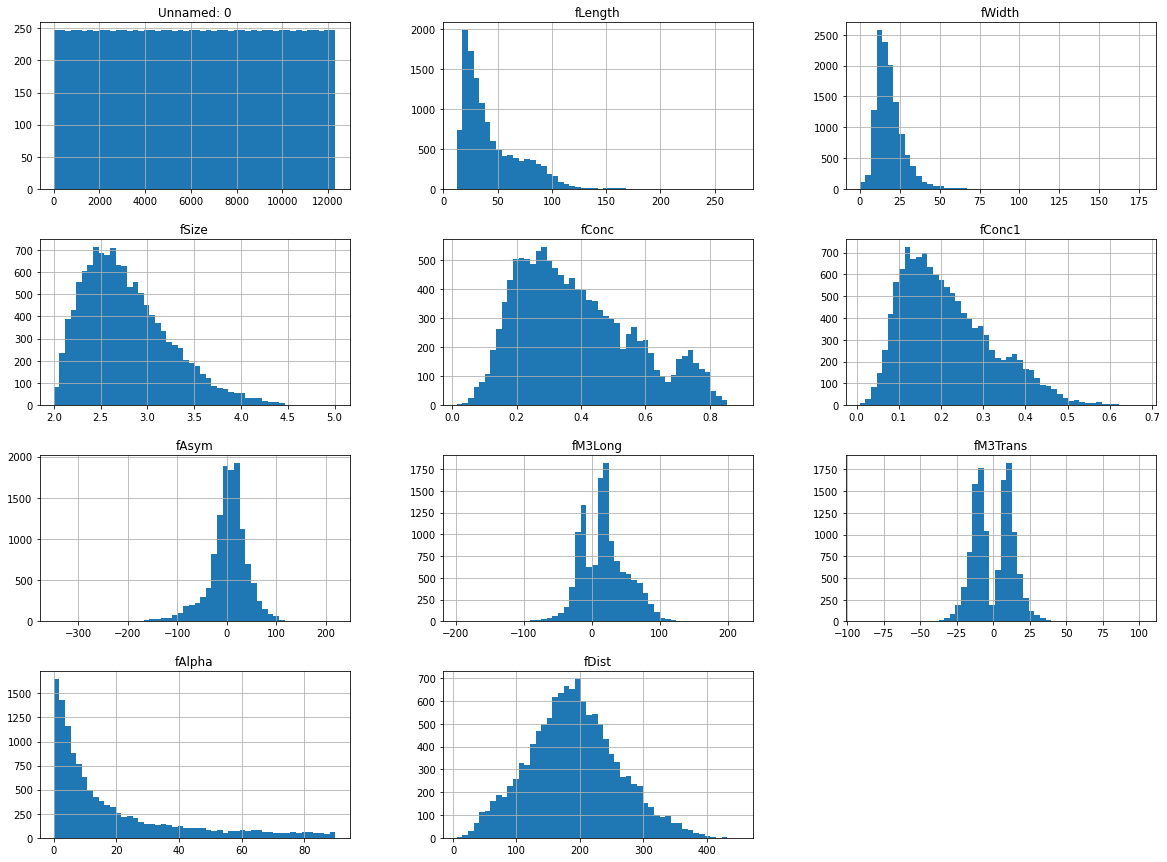

In [14]:
df_g.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'fLength'}>,
        <AxesSubplot:title={'center':'fWidth'}>],
       [<AxesSubplot:title={'center':'fSize'}>,
        <AxesSubplot:title={'center':'fConc'}>,
        <AxesSubplot:title={'center':'fConc1'}>],
       [<AxesSubplot:title={'center':'fAsym'}>,
        <AxesSubplot:title={'center':'fM3Long'}>,
        <AxesSubplot:title={'center':'fM3Trans'}>],
       [<AxesSubplot:title={'center':'fAlpha'}>,
        <AxesSubplot:title={'center':'fDist'}>, <AxesSubplot:>]],
      dtype=object)

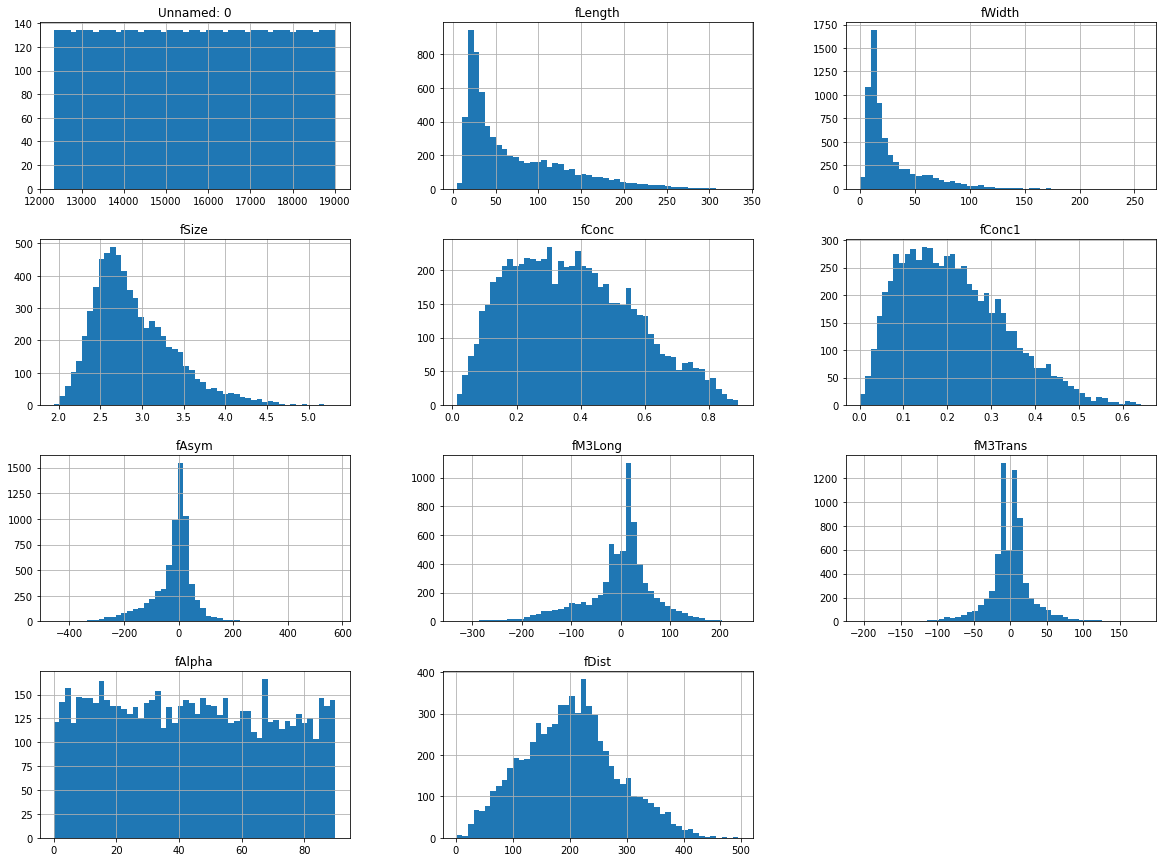

In [15]:
df_h.hist(bins=50, figsize=(20,15))

<Figure size 432x288 with 0 Axes>

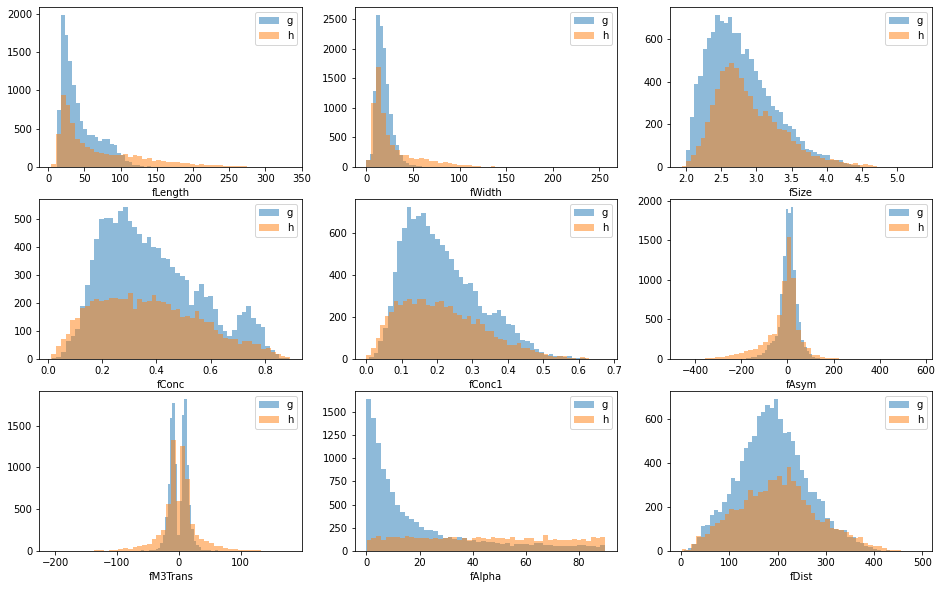

In [16]:
fig = plt.figure()
fig,ax=plt.subplots(3,3, figsize=(16.0, 10.0))
ax[0][0].hist(df_g['fLength'], bins=50, alpha=0.5 ,label='g')
ax[0][0].hist(df_h['fLength'], bins=50, alpha=0.5 ,label='h')
ax[0][0].set_xlabel('fLength')
ax[0][0].legend()

ax[0][1].hist(df_g['fWidth'], bins=50, alpha=0.5 ,label='g')
ax[0][1].hist(df_h['fWidth'], bins=50, alpha=0.5 ,label='h')
ax[0][1].set_xlabel('fWidth')
ax[0][1].legend()

ax[0][2].hist(df_g['fSize'], bins=50, alpha=0.5 ,label='g')
ax[0][2].hist(df_h['fSize'], bins=50, alpha=0.5 ,label='h')
ax[0][2].set_xlabel('fSize')
ax[0][2].legend()

ax[1][0].hist(df_g['fConc'], bins=50, alpha=0.5 ,label='g')
ax[1][0].hist(df_h['fConc'], bins=50, alpha=0.5 ,label='h')
ax[1][0].set_xlabel('fConc')
ax[1][0].legend()

ax[1][1].hist(df_g['fConc1'], bins=50, alpha=0.5 ,label='g')
ax[1][1].hist(df_h['fConc1'], bins=50, alpha=0.5 ,label='h')
ax[1][1].set_xlabel('fConc1')
ax[1][1].legend()

ax[1][2].hist(df_g['fAsym'], bins=50, alpha=0.5 ,label='g')
ax[1][2].hist(df_h['fAsym'], bins=50, alpha=0.5 ,label='h')
ax[1][2].set_xlabel('fAsym')
ax[1][2].legend()

ax[2][0].hist(df_g['fM3Trans'], bins=50, alpha=0.5 ,label='g')
ax[2][0].hist(df_h['fM3Trans'], bins=50, alpha=0.5 ,label='h')
ax[2][0].set_xlabel('fM3Trans')
ax[2][0].legend()

ax[2][1].hist(df_g['fAlpha'], bins=50, alpha=0.5 ,label='g')
ax[2][1].hist(df_h['fAlpha'], bins=50, alpha=0.5 ,label='h')
ax[2][1].set_xlabel('fAlpha')
ax[2][1].legend()

ax[2][2].hist(df_g['fDist'], bins=50, alpha=0.5 ,label='g')
ax[2][2].hist(df_h['fDist'], bins=50, alpha=0.5 ,label='h')
ax[2][2].set_xlabel('fDist')
ax[2][2].legend()
plt.show()

# 2. GBDT Model

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [18]:
x = df.drop(['class'], axis=1)
y = df['class']

In [19]:
# Label Encording
le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
# GBDT Model Training
model = XGBClassifier(n_estimators=10, random_state=42)

In [23]:
model.fit(x_train, y_train)

[15:50:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
# Prediction
y_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[2460,    0],
       [   0, 1344]])

In [27]:
cm = confusion_matrix(y_test, y_pred)

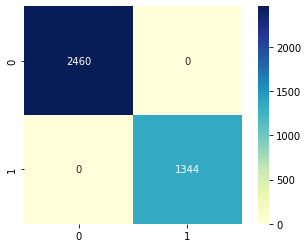

In [28]:
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='YlGnBu', fmt="d")
plt.show()

In [29]:
# Accuracy
accuracy_score(y_test, y_pred)

1.0

#### I recieved a comment: Actually, the way in which you are considering the columns introduces a bias. The reason why you have such bias is that the 0th column (the one with the indexes) is very discriminative.Thank you, Nicolò.

In [30]:
x2 = x.drop(['Unnamed: 0'], axis=1)

In [31]:
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

In [32]:
# GBDT Model Training
model2 = XGBClassifier(n_estimators=10, random_state=42)

In [33]:
model2.fit(x2_train, y_train)

[15:50:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
# Prediction
y2_pred = model2.predict(x2_test)

In [35]:
# Confusion Matrix
confusion_matrix(y_test, y2_pred)

array([[2322,  138],
       [ 371,  973]])

In [36]:
cm2 = confusion_matrix(y_test, y2_pred)

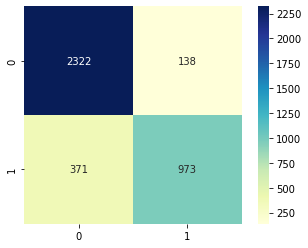

In [37]:
sns.heatmap(cm2, square=True, cbar=True, annot=True, cmap='YlGnBu', fmt="d")
plt.show()

In [38]:
# Accuracy
accuracy_score(y_test, y2_pred)

0.8661934805467929